# Project 5

### Table of Contents

* [Problem Statement](#Problem-Statement)
* [Data Dictionary](#Data-Dictionary)
* [2019 Crash Data](#2019-Crash-Data)
* [2020 Crash Data](#2020-Crash-Data)

### Problem Statement 

Is there a day of the week and/or time of day that correlates to car crashes in Chicago?

<b> https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|

Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 55)
sns.set_style(style='darkgrid')
pd.set_option('display.max_rows', 200)

### 2019 Crash Data

In [38]:
df_19 = pd.read_csv('data/Traffic_Crashes__Crashes_2019.csv')

In [3]:
df_19.shape

(117427, 49)

In [4]:
df_19.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec97...,JC111663,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
1,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e32...,JC100635,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
2,0777b210b7a60ac1338d90e20520d421c3241971049303ff115...,JC100780,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
3,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3f...,JC100033,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
4,cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a...,JC100171,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)


In [5]:
df_19.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                                 0
CRASH_DATE_EST_I                 108787
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                          98175
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        3609
CRASH_TYPE                            0
INTERSECTION_RELATED_I            89521
NOT_RIGHT_OF_WAY_I               111617
HIT_AND_RUN_I                     84161
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


Dropping columns that are over 90% nulls.

In [6]:
df_19.drop(columns = ['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 
                       'WORKERS_PRESENT_I', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
                       'LANE_CNT', 'CRASH_DATE_EST_I'], inplace = True)

In [7]:
df_19.isnull().sum().sort_values()

CRASH_RECORD_ID                     0
CRASH_MONTH                         0
CRASH_DAY_OF_WEEK                   0
CRASH_HOUR                          0
NUM_UNITS                           0
BEAT_OF_OCCURRENCE                  0
STREET_NAME                         0
STREET_DIRECTION                    0
STREET_NO                           0
PRIM_CONTRIBUTORY_CAUSE             0
DATE_POLICE_NOTIFIED                0
DAMAGE                              0
CRASH_TYPE                          0
SEC_CONTRIBUTORY_CAUSE              0
ROAD_DEFECT                         0
ROADWAY_SURFACE_COND                0
ALIGNMENT                           0
TRAFFICWAY_TYPE                     0
RD_NO                               0
FIRST_CRASH_TYPE                    0
LIGHTING_CONDITION                  0
WEATHER_CONDITION                   0
DEVICE_CONDITION                    0
TRAFFIC_CONTROL_DEVICE              0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
INJURIES_UNK

Dropping 'INJURIES_UNKNOWN' since all values are 0.

In [8]:
df_19.drop(columns = ['INJURIES_UNKNOWN'], inplace = True)

Dropping irrelevant column.

In [10]:
df_19.drop(columns = ['REPORT_TYPE','CRASH_RECORD_ID','BEAT_OF_OCCURRENCE', 'DATE_POLICE_NOTIFIED'], inplace = True)

Filling in nulls with 0.

In [11]:
df_19['INJURIES_NO_INDICATION'].fillna('0', inplace = True)
df_19['INJURIES_REPORTED_NOT_EVIDENT'].fillna('0', inplace = True)
df_19['INJURIES_TOTAL'].fillna('0', inplace = True)
df_19['INJURIES_INCAPACITATING'].fillna('0', inplace = True)
df_19['INJURIES_FATAL'].fillna('0', inplace = True)
df_19['INJURIES_NON_INCAPACITATING'].fillna('0', inplace = True)

Filling nulls with 'NO INDICATION OF INJURY' for column 'MOST_SEVERE_INJURY' since that is the most common value and most likely to be the case if nothing was reported.

In [12]:
df_19['MOST_SEVERE_INJURY'].fillna('NO INDICATION OF INJURY', inplace = True)

Drop remaining null values.

In [13]:
df_19.dropna(inplace = True)

In [14]:
df_19.set_index('RD_NO')

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
JC100635,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
JC100780,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
JC100033,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
JC100171,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500","OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,3,NO INDICATION OF INJURY,0,0,0,0,0,5,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JC566001,12/30/2019 11:13:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,BLOWING SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,DISREGARDING TRAFFIC SIGNALS,3800,S,CALIFORNIA AVE,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,23,2,12,41.824566,-87.694807,POINT (-87.69480737563 41.824566227681)
JC566028,12/30/2019 11:15:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,7603,S,SOUTH CHICAGO AVE,3,"REPORTED, NOT EVIDENT",1,0,0,0,1,4,23,2,12,41.756856,-87.592814,POINT (-87.592814173444 41.756855834805)
JC566011,12/30/2019 11:30:00 PM,20,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,4813,N,CENTRAL PARK AVE,2,NO INDICATION OF INJURY,0,0,0,0,0,2,23,2,12,41.968780,-87.718119,POINT (-87.718119320708 41.968780354173)


Drop columns Latitude,longitude , location since the numerical values are not representative of magnitude or order

In [15]:
df_19.drop(columns = ['LATITUDE','LONGITUDE','LOCATION'], inplace = True)

Drop street number, direction and name - since they are unlikely to have an effect on crashes

In [16]:
df_19.drop(columns = ['STREET_NO','STREET_DIRECTION','STREET_NAME'], inplace = True)

Drop crash_date, since we have hour, day of week and month for aggregation

In [17]:
df_19.drop(columns = ['CRASH_DATE'], inplace = True)

In [18]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116510 entries, 0 to 117426
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   RD_NO                          116510 non-null  object
 1   POSTED_SPEED_LIMIT             116510 non-null  int64 
 2   TRAFFIC_CONTROL_DEVICE         116510 non-null  object
 3   DEVICE_CONDITION               116510 non-null  object
 4   WEATHER_CONDITION              116510 non-null  object
 5   LIGHTING_CONDITION             116510 non-null  object
 6   FIRST_CRASH_TYPE               116510 non-null  object
 7   TRAFFICWAY_TYPE                116510 non-null  object
 8   ALIGNMENT                      116510 non-null  object
 9   ROADWAY_SURFACE_COND           116510 non-null  object
 10  ROAD_DEFECT                    116510 non-null  object
 11  CRASH_TYPE                     116510 non-null  object
 12  DAMAGE                         116510 non-nu

In [26]:
df_19.set_index('RD_NO',inplace = True)

In [44]:
df_19.to_csv('../data/cleaned_data.csv')

In [45]:
df_19 = pd.read_csv('../data/cleaned_data.csv')

In [43]:
df_19[df_19['INJURIES_FATAL']!=0]['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 178
NOT APPLICABLE                                                                       48
WEATHER                                                                              22
EQUIPMENT - VEHICLE CONDITION                                                        18
FAILING TO REDUCE SPEED TO AVOID CRASH                                               13
IMPROPER BACKING                                                                     12
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     11
PHYSICAL CONDITION OF DRIVER                                                         11
FAILING TO YIELD RIGHT-OF-WAY                                                         9
DISREGARDING TRAFFIC SIGNALS                                                          8
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   5
DISTRACTION - FROM INSIDE VEHICL

# EDA

# Top 15 primary causes

In [27]:
known_cause = df_19[df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [28]:
known_cause = known_cause[known_cause['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [29]:
def cntplot_sorted_value_h(y,data,):
    plt.figure(figsize=(12,8))
    sns.countplot( y = y , 
                   data = data,
                  order = data[y].value_counts().index[:15]);


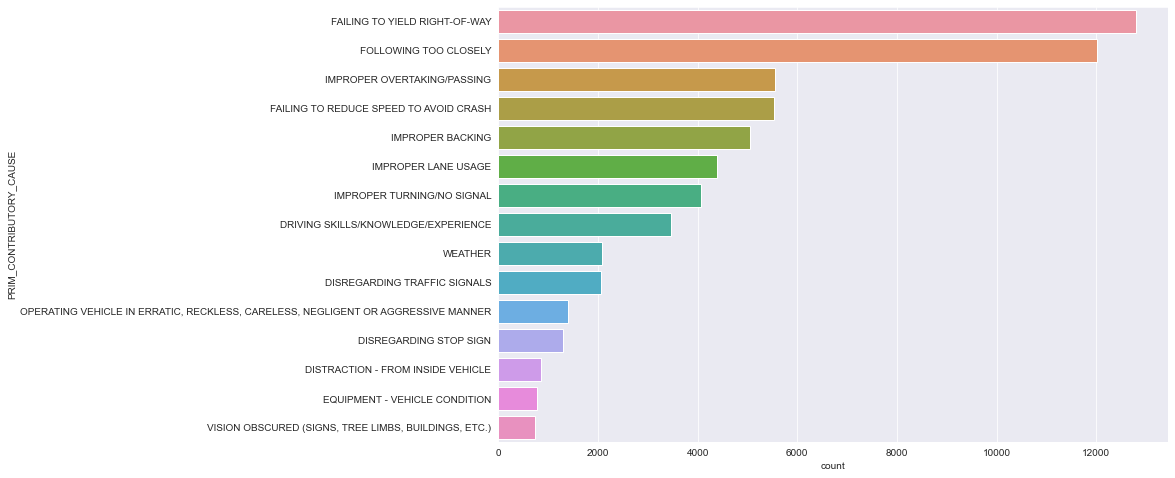

In [30]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause)

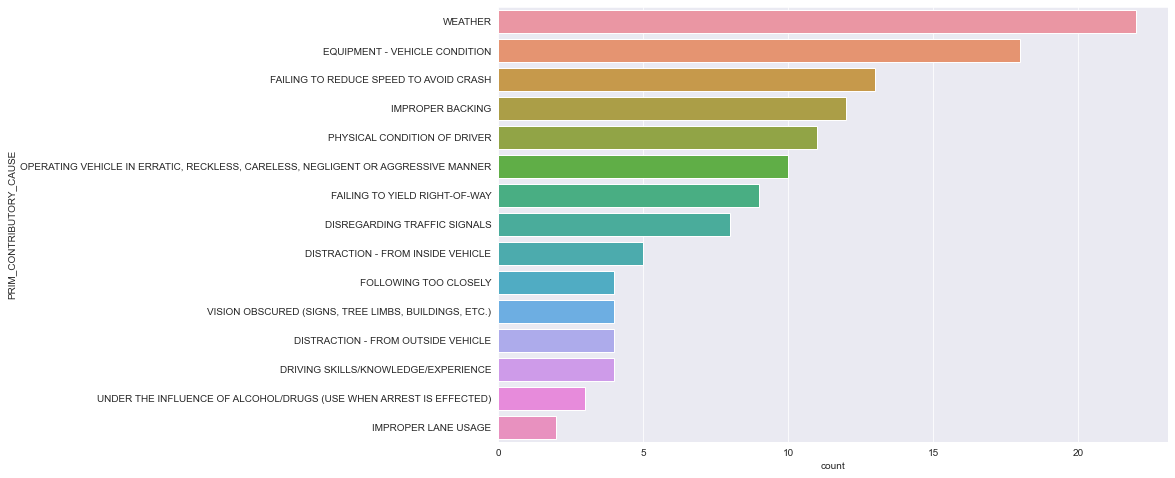

In [31]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_FATAL']!=0])

In [ ]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause[known_cause['INJURIES_INCAPACITATING']!=0])

In [ ]:
cntplot_sorted_value_h('WEATHER_CONDITION' , df_19)

Surprisingly, bad weather does not seem to be a huge  contributory factor

In [ ]:
cntplot_sorted_value_h('ROADWAY_SURFACE_COND', df_19)

In [ ]:
cntplot_sorted_value_h('WEATHER_CONDITION', df_19[df_19['INJURIES_FATAL']==0])

Confirms the conclusion from the weather plot

In [ ]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']!=0])

In [ ]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19[df_19['INJURIES_FATAL']==0])

Not divided Trafficways have more than twice the number of crashes of the next highest number of crashes by trafficway

In [ ]:
def countplt( x , data):
    sns.countplot( x = x,
                 data = data);

In [ ]:
countplt('CRASH_HOUR', df_19)

In [ ]:
countplt('CRASH_MONTH', df_19)

In [ ]:
countplt('CRASH_DAY_OF_WEEK', df_19)
plt.xticks(ticks= [0,1,2,3,4,5,6],
           labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
           rotation = 45);

In [ ]:
countplt('POSTED_SPEED_LIMIT' , df_19) 

In [ ]:
 df_19['DEVICE_CONDITION'].value_counts()

In [ ]:
df_19[(df_19['INJURIES_FATAL']!=0) & (df_19['PRIM_CONTRIBUTORY_CAUSE'] == 'WEATHER')]

In [ ]:
df_model = pd.read_csv('./data/cluster_info.csv')

In [ ]:
df_19['cluster'] = df_model['cluster']

In [ ]:
df_19.head()

In [ ]:
 sns.countplot( y = 'INJURIES_TOTAL' , 
                   data = df_19,
                   hue = df_19['cluster']
                 );
    

In [ ]:
known_cause = df_19[(df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE')
                    & (df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE') ]

In [ ]:
 sns.countplot( y = 'PRIM_CONTRIBUTORY_CAUSE' , 
                   data = known_cause,
                   hue = known_cause['cluster'],
                  order =known_cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index[:15])

In [ ]:
df_19['cluster'].value_counts()

In [ ]:
df_19.drop(columns = ['BEAT_OF_OCCURRENCE'], inplace=True)

In [ ]:
df_19.groupby('cluster').mean().T

In [ ]:
df_model.groupby('cluster').mean().T

In [ ]:
df_19.columns

In [ ]:
injury_cols

In [ ]:
sns.countplot(x = df_19['INJURIES_NO_INDICATION'], hue = df_19['cluster'], order =df_19['INJURIES_NO_INDICATION'].value_counts().index[:15]);

In [ ]:
sns.countplot(x = df_19['INJURIES_FATAL'], hue = df_19['cluster'], order =df_19['INJURIES_FATAL'].value_counts().index[:15]);

In [ ]:
df_19.columns

In [ ]:
df_daylight = df_19[df_19['LIGHTING_CONDITION']=='DAYLIGHT']

In [ ]:
df_daylight['INJURIES_FATAL'].value_counts(normalize=True)

In [ ]:
df_19['INJURIES_FATAL'].value_counts(normalize=True)

In [46]:
df_19[df_19['INJURIES_FATAL']!=0]['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 178
NOT APPLICABLE                                                                       48
WEATHER                                                                              22
EQUIPMENT - VEHICLE CONDITION                                                        18
FAILING TO REDUCE SPEED TO AVOID CRASH                                               13
IMPROPER BACKING                                                                     12
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     11
PHYSICAL CONDITION OF DRIVER                                                         11
FAILING TO YIELD RIGHT-OF-WAY                                                         9
DISREGARDING TRAFFIC SIGNALS                                                          8
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   5
DISTRACTION - FROM INSIDE VEHICL